In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df= pd.read_parquet("yellow_tripdata_2022-01.parquet")

In [ ]:
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
print(df.shape)

(2463931, 19)


In [ ]:
print(df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64


In [ ]:
print(df.describe(include ='all'))

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   2.463931e+06                     2463931                     2463931   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.707819e+00  2022-01-17 01:19:51.689724  2022-01-17 01:34:04.421902   
min     1.000000e+00         2008-12-31 22:23:09         2008-12-31 23:06:56   
25%     1.000000e+00         2022-01-09 15:37:41  2022-01-09 15:50:50.500000   
50%     2.000000e+00         2022-01-17 12:11:45         2022-01-17 12:23:49   
75%     2.000000e+00  2022-01-24 13:49:37.500000         2022-01-24 14:02:51   
max     6.000000e+00         2022-05-18 20:41:57         2022-05-18 20:47:45   
std     5.021375e-01                         NaN                         NaN   

        passenger_count  trip_distance 

In [ ]:
df_cleaned =df.dropna()
print(df_cleaned)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2392423         1  2022-01-31 23:24:28   2022-01-31 23:32:47              1.0   
2392424         2  2022-01-31 23:17:44   2022-01-31 23:22:05              1.0   
2392425         2  2022-01-31 23:26:41   2022-01-31 23:34:54              1.0   
2392426         2  2022-01-31 23:37:41   2022-01-31 23:45:26              1.0   
2392427         2  2022-01-31 23:43:22   2022-01-31 23:55:36              1.0   

         trip_distance  Rat

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df['trip_duration_minutes'])

0          17.816667
1           8.400000
2           8.966667
3          10.033333
4          37.533333
             ...    
2463926     5.966667
2463927    10.650000
2463928    11.000000
2463929    12.050000
2463930    27.000000
Name: trip_duration_minutes, Length: 2463931, dtype: float64


In [ ]:
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
print(df['pickup_hour'])

0           0
1           0
2           0
3           0
4           0
           ..
2463926    23
2463927    23
2463928    23
2463929    23
2463930    23
Name: pickup_hour, Length: 2463931, dtype: int32


In [ ]:
df['pickup_day_of_week'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()
print(df['pickup_day_of_week'])

0          Saturday
1          Saturday
2          Saturday
3          Saturday
4          Saturday
             ...   
2463926      Monday
2463927      Monday
2463928      Monday
2463929      Monday
2463930      Monday
Name: pickup_day_of_week, Length: 2463931, dtype: object


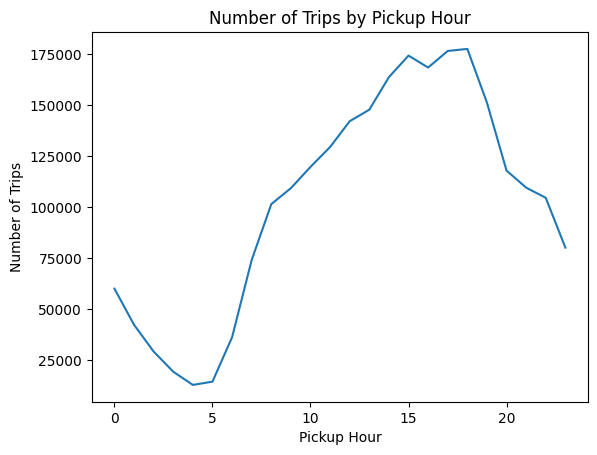

In [ ]:
sns.lineplot(x='pickup_hour', y='count', data=df.groupby('pickup_hour').size().reset_index(name='count'))
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.show()

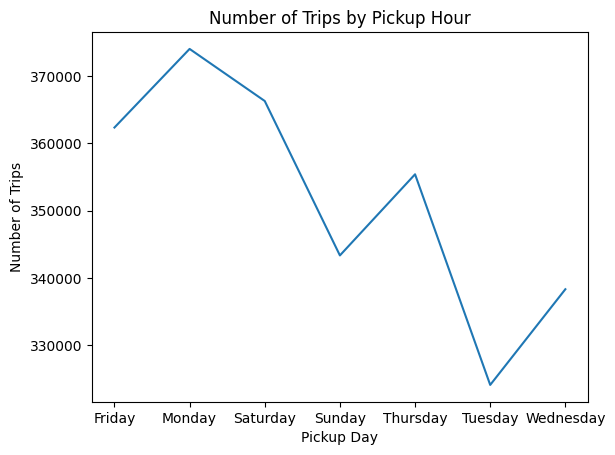

In [ ]:
sns.lineplot(x='pickup_day_of_week', y='count', data=df.groupby('pickup_day_of_week').size().reset_index(name='count'))
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Day')
plt.ylabel('Number of Trips')
plt.show()

In [ ]:
correlation_matrix = df.corr
print(correlation_matrix)

<bound method DataFrame.corr of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2463926         2  2022-01-31 23:36:53   2022-01-31 23:42:51              NaN   
2463927         2  2022-01-31 23:44:22   2022-01-31 23:55:01              NaN   
2463928         2  2022-01-31 23:39:00   2022-01-31 23:50:00              NaN   
2463929         2  2022-01-31 23:36:42   2022-01-31 23:48:45              NaN   
2463930         2  2022-01-31 23:46:00   2022-02-01 00:13:00              NaN

In [11]:
from google.colab import files
uploaded = files.upload()

Saving yellow_tripdata_2022-01.parquet to yellow_tripdata_2022-01.parquet


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_parquet("yellow_tripdata_2022-01.parquet")

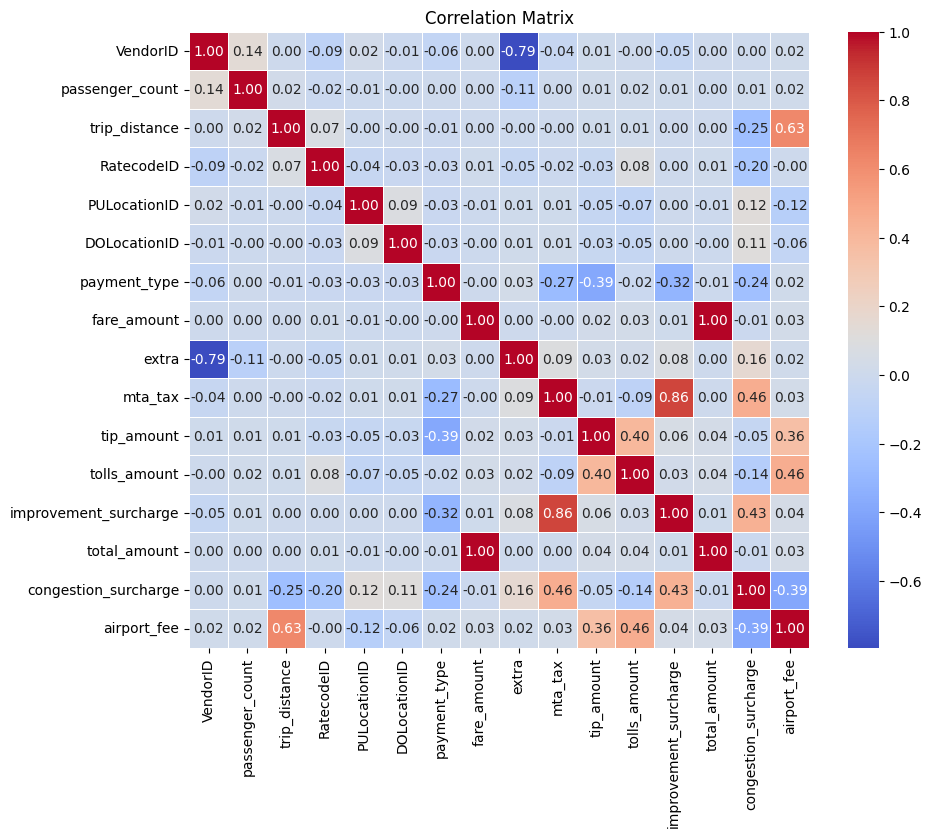

In [14]:
numerical_columns = df.select_dtypes(include=['number'])
df = df.dropna(subset=numerical_columns.columns)
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

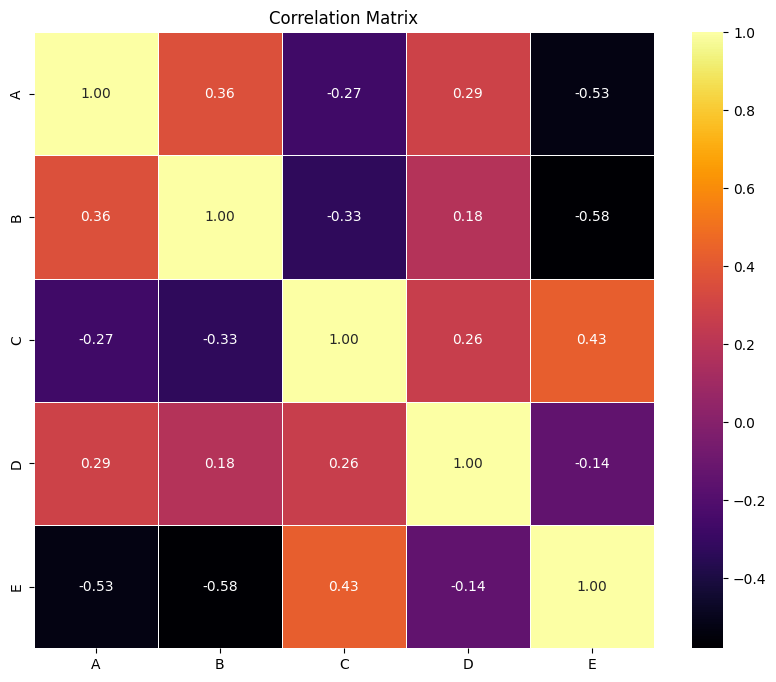

In [19]:
import numpy as np
np.random.seed(0)
data = np.random.rand(10, 5)  # 10 rows, 5 columns
columns = ['A', 'B', 'C', 'D', 'E']
df = pd.DataFrame(data, columns=columns)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

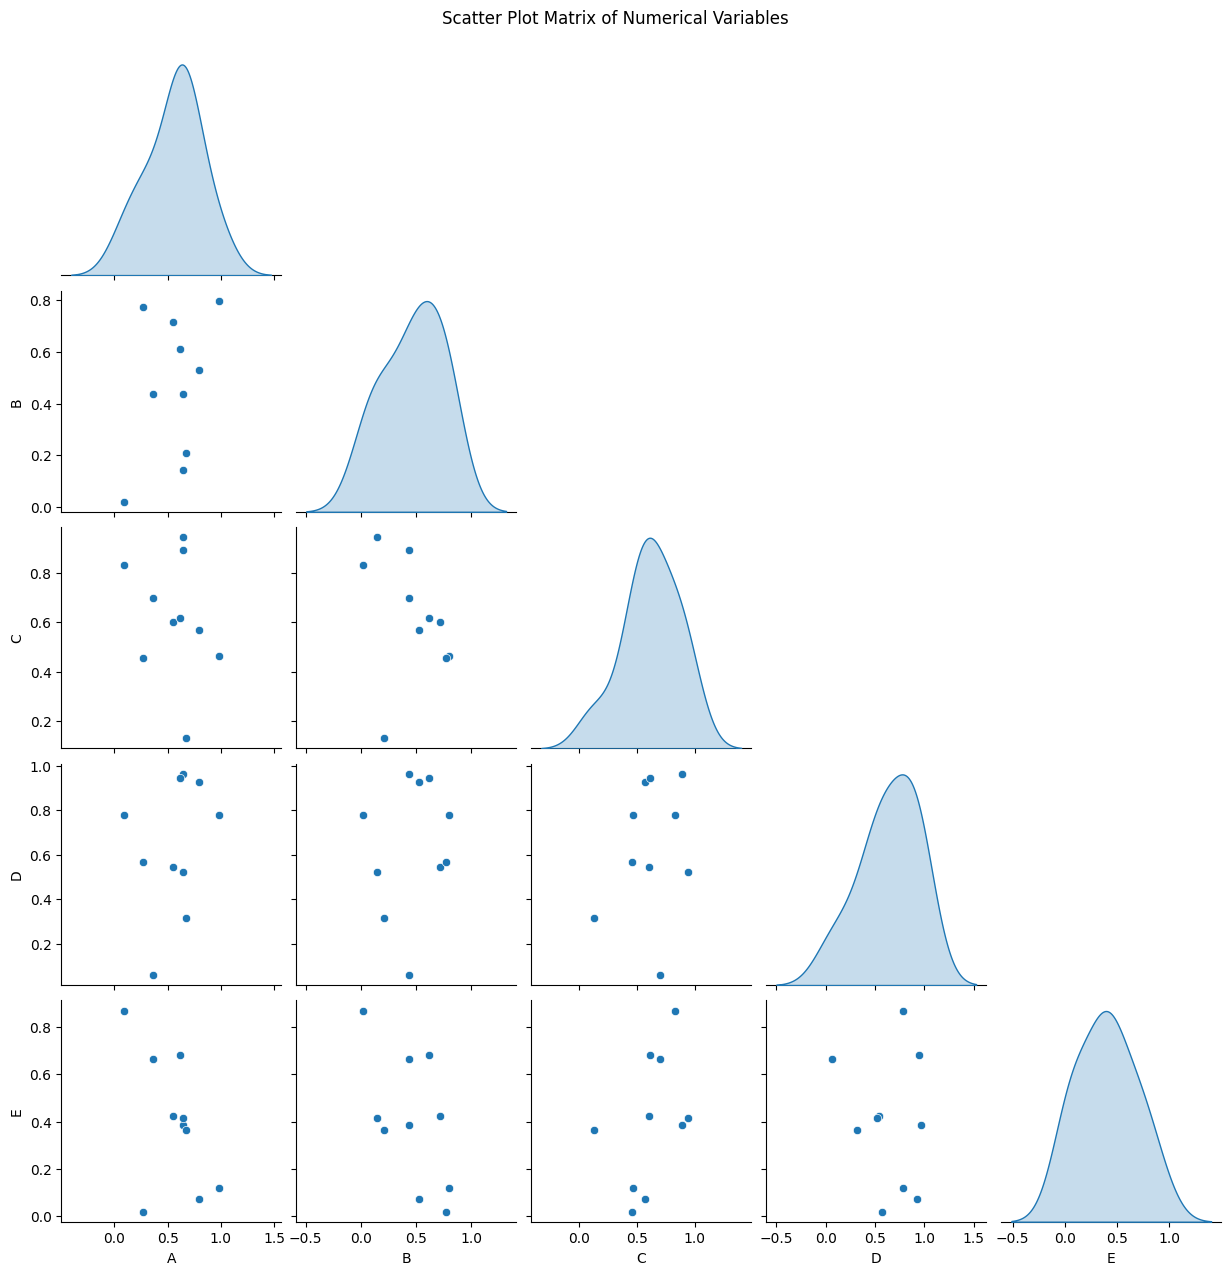

In [21]:
sampled_df = df.sample(n=1000, random_state=42) if len(df) > 1000 else df
sns.pairplot(sampled_df,diag_kind='kde',corner=True, height= 2.5)
plt.suptitle("Scatter Plot Matrix of Numerical Variables", y=1.02)
plt.show()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving yellow_tripdata_2022-01.parquet to yellow_tripdata_2022-01.parquet


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_parquet("yellow_tripdata_2022-01.parquet")

In [7]:
top_pulocation = df['PULocationID'].value_counts().nlargest(15).index
top_dolocation = df['DOLocationID'].value_counts().nlargest(15).index

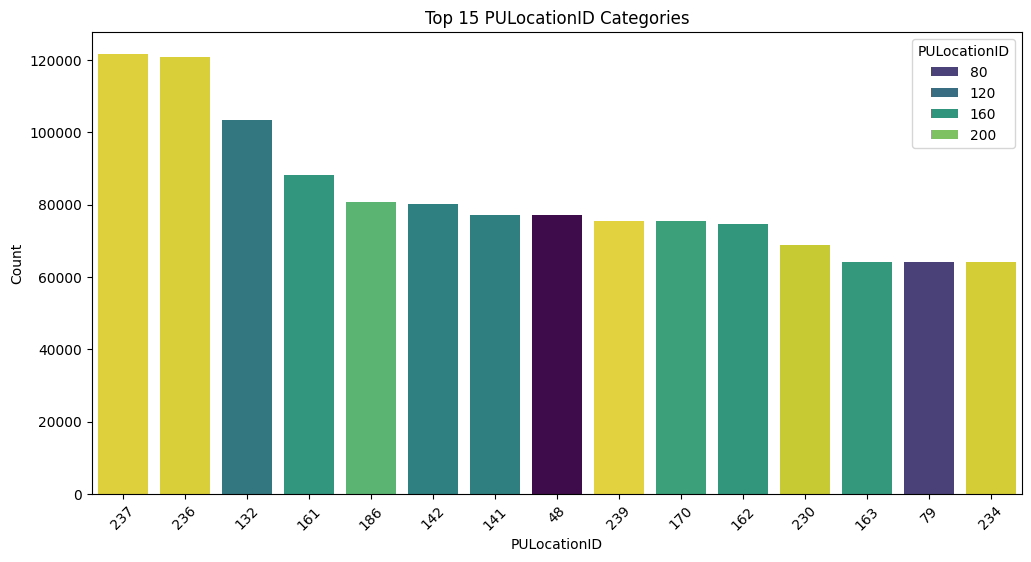

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PULocationID', data=df[df['PULocationID'].isin(top_pulocation)],
              order=top_pulocation, palette='viridis', hue ='PULocationID', dodge=False)
plt.title('Top 15 PULocationID Categories')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

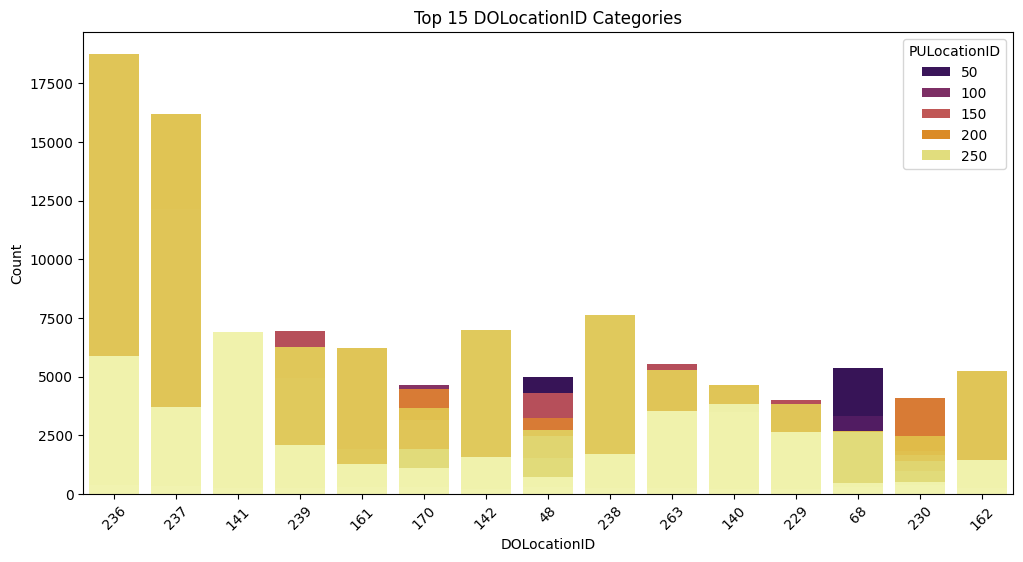

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DOLocationID', data=df[df['DOLocationID'].isin(top_dolocation)],
              order=top_dolocation, palette='inferno',  hue ='PULocationID', dodge=False)
plt.title('Top 15 DOLocationID Categories')
plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

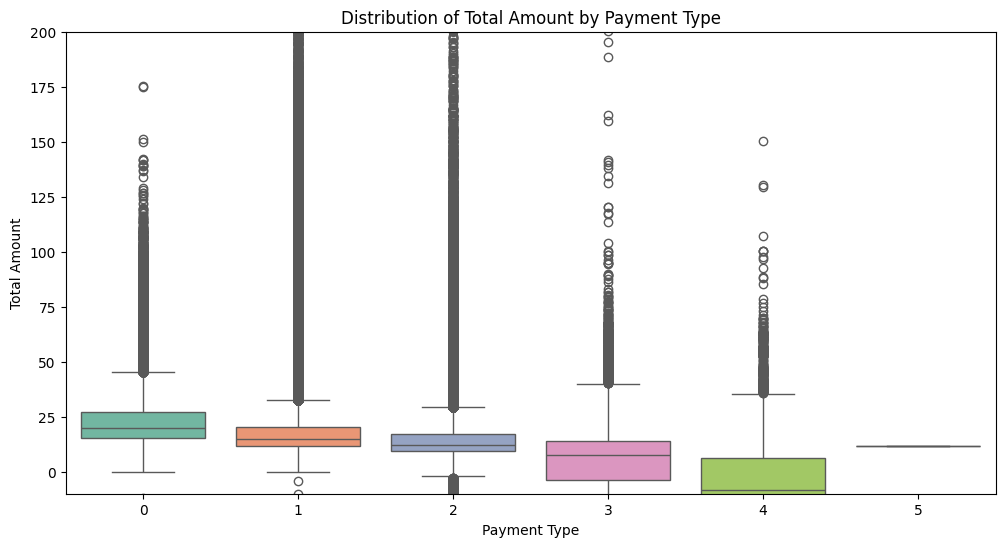

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='payment_type',
    y='total_amount',
    data=df,
    palette='Set2',
    hue = 'payment_type'
)
plt.legend([], [], frameon=False)
plt.title('Distribution of Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.ylim(-10, 200)
plt.show()

In [23]:
negative_amounts = df[df['total_amount'] < 0]
print(negative_amounts)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
154             2  2022-01-01 00:26:37   2022-01-01 00:39:35              1.0   
521             2  2022-01-01 00:27:18   2022-01-01 00:40:50              1.0   
523             2  2022-01-01 00:59:33   2022-01-01 01:14:09              4.0   
580             2  2022-01-01 00:16:58   2022-01-01 00:19:41              1.0   
714             2  2022-01-01 00:29:12   2022-01-01 00:40:29              1.0   
...           ...                  ...                   ...              ...   
2453895         2  2022-01-29 15:32:00   2022-01-29 15:34:00              NaN   
2454848         2  2022-01-29 19:26:00   2022-01-29 19:27:00              NaN   
2455887         2  2022-01-29 22:42:42   2022-01-29 22:44:01              NaN   
2458027         2  2022-01-30 12:27:00   2022-01-30 13:12:00              NaN   
2458939         2  2022-01-30 15:16:59   2022-01-30 15:37:45              NaN   

         trip_distance  Rat

In [24]:
high_amounts = df[df['total_amount'] > 200]
print(high_amounts)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
799             2  2022-01-01 00:35:56   2022-01-01 00:36:12              1.0   
7256            2  2022-01-01 01:28:08   2022-01-01 02:15:45              3.0   
8774            2  2022-01-01 02:16:42   2022-01-01 02:17:26              1.0   
13106           2  2022-01-01 03:47:07   2022-01-01 04:59:06              1.0   
15859           1  2022-01-01 04:19:47   2022-01-01 04:21:16              2.0   
...           ...                  ...                   ...              ...   
2369967         2  2022-01-31 18:32:10   2022-01-31 19:42:56              1.0   
2384342         2  2022-01-31 21:37:41   2022-01-31 22:38:37              1.0   
2388037         2  2022-01-31 22:22:53   2022-02-01 00:34:41              1.0   
2391068         1  2022-01-31 23:21:52   2022-02-01 00:09:42              1.0   
2443757         1  2022-01-26 11:18:44   2022-01-26 13:27:24              NaN   

         trip_distance  Rat

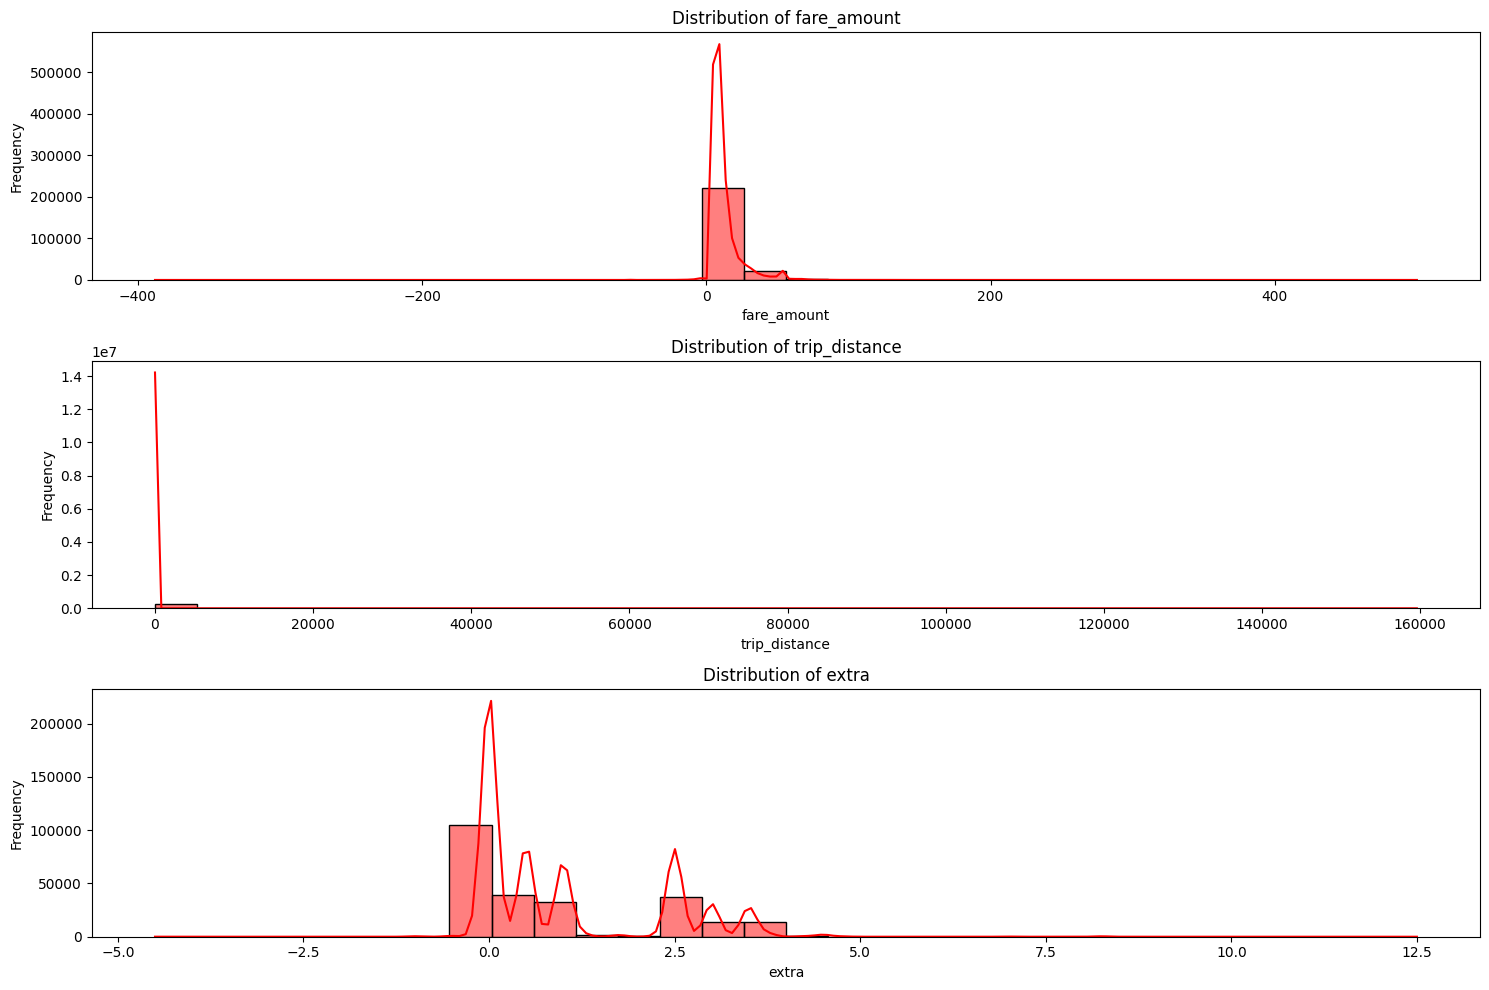

In [27]:
sampled_df = df.sample(frac=0.1, random_state=42)
variables = ['fare_amount', 'trip_distance', 'extra']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 1, i)  # Create a subplot for each variable
    sns.histplot(data=sampled_df, x=var, kde=True, bins=30, color='red')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()